# Section 1: Bussiness Understanding
Airbnb is an American vacation rental online marketplace company based in San Francisco. Airbnb maintains and hosts a marketplace, accessible to consumers on its website or via an app. Through the service, users can arrange lodging, primarily homestays, and tourism experiences or list their properties for rental. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking.

Question 1 - What are the most popular Property and Room Types listed?
Question 2 - What is the average price for a Listing based on Property Type, Room Type, Number of Guests, and Number of Bedrooms?
Question 3 - Is it possible to predict the price of listings and what are the most important features in determining the price?

In [14]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#reading in the dataset
df = pd.read_csv('listings.csv')


In [16]:
#expanding output diaplay for columns and rows
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)

# Section 2: Data Understanding



In [17]:
#checking the first row of dataset
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [19]:
#checking for features wiyh missing values
df_1.isnull().sum()

id                                     0
last_scraped                           0
name                                   0
experiences_offered                    0
host_id                                0
host_name                              2
host_since                             2
host_location                          8
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_total_listings_count              2
street                                 0
neighbourhood                        416
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   0
state                                  0
zipcode                                7
market                                 0
smart_location                         0
latitude        

# Section 3: Data Preparation

I dont plan on doing NLP on this dataset i removed all the columns that containe text files.


In [18]:
#droppin columns with text and links
df_1 = df.drop(['listing_url','scrape_id','space','description','notes','transit','thumbnail_url','medium_url','neighborhood_overview','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url','host_picture_url','host_verifications','host_has_profile_pic','host_identity_verified','country_code','country','jurisdiction_names','summary'],axis = 1)

In [20]:
#dropping columns with lots of Nan Values except cleaning_fee
df_2 = df_1.drop(['license','square_feet','weekly_price','monthly_price'],axis = 1)

In [21]:
#viewing remaining columns
df_2.columns

Index(['id', 'last_scraped', 'name', 'experiences_offered', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating',

After viewing the columns individually i decided to drop this columns. They might not be relevant in determining price of a listing. Some them like street, market, smart_location contained information we can also get from the neighbourhood columns.


In [22]:
#dropping columns with information not needed for this analysis
df_3 = df_2.drop(['smart_location','last_scraped','experiences_offered','zipcode','require_guest_profile_picture','reviews_per_month','host_name','host_location','host_response_time','host_response_rate','host_acceptance_rate','host_neighbourhood','host_listings_count','city','state','latitude','longitude','is_location_exact','calendar_updated',

      'calendar_last_scraped', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'host_id','host_total_listings_count','street','market','host_is_superhost','host_since','name','id','first_review','last_review'], axis = 1)

In [23]:
df_3.head(1)

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,2,$5.00,1,365,t,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2


In [24]:
df_3['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [25]:
df_3['price'].dtype

dtype('O')

The columns with money value price, security_deposit, cleaning_fee, 'extra_people' are saved as objects because of the '$'. 

In [27]:
#removing $
df_3['price'] = df_3['price'].str.replace(',', '')
df_3['price'] = df_3['price'].str.replace('$', '')
df_3['price']

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
         ...  
3813    359.00
3814     79.00
3815     93.00
3816     99.00
3817     87.00
Name: price, Length: 3818, dtype: object

In [28]:
df_3['security_deposit'] = df_3['security_deposit'].str.replace(',', '')
df_3['security_deposit'] = df_3['security_deposit'].str.replace('$', '')
df_3['security_deposit']

0           NaN
1        100.00
2       1000.00
3           NaN
4        700.00
         ...   
3813        NaN
3814     500.00
3815     250.00
3816     300.00
3817        NaN
Name: security_deposit, Length: 3818, dtype: object

In [29]:
#replacing all Nan value for security_deposit to 0 to indicate there isnt a security deposit for the place.
df_3['security_deposit'].fillna(value = 0,inplace = True)

In [30]:
df_3['extra_people'] = df_3['extra_people'].str.replace(',', '')
df_3['extra_people'] = df_3['extra_people'].str.replace('$', '')
df_3['extra_people']

0        5.00
1        0.00
2       25.00
3        0.00
4       15.00
        ...  
3813     0.00
3814    25.00
3815    20.00
3816     0.00
3817     0.00
Name: extra_people, Length: 3818, dtype: object

In [31]:

df_3['cleaning_fee'] = df_3['cleaning_fee'].str.replace(',', '')
df_3['cleaning_fee'] = df_3['cleaning_fee'].str.replace('$', '')
df_3['cleaning_fee']

0          NaN
1        40.00
2       300.00
3          NaN
4       125.00
         ...  
3813    230.00
3814     50.00
3815     35.00
3816     45.00
3817       NaN
Name: cleaning_fee, Length: 3818, dtype: object

In [32]:
#replacing all Nan value for cleaning_fee to 0 to indicate there isnt a cleaning fee for the place.

df_3['cleaning_fee'].fillna(value = 0,inplace = True)

In [33]:
df_3['security_deposit'].isnull().sum()

0

In [34]:
#converting from object to flaot
df_3['price'] = df_3['price'].astype('float')
df_3['extra_people'] = df_3['extra_people'].astype('float')
df_3['security_deposit'] = df_3['security_deposit'].astype('float')
df_3['cleaning_fee'] = df_3['cleaning_fee'].astype('float')

The neighbourhood_cleansed column is the best fit for our analysis. So i am dropping neighbourhood, neighbourhood_group_cleansed.

In [35]:

df_4 = df_3.drop(['neighbourhood','neighbourhood_group_cleansed'],axis = 1)

In [36]:
df_4.columns


Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count'],
      dtype='object')

In [37]:
df_4['bedrooms'].isnull().sum()

6

Replacing the missing values for the bedrooms, beds, bathrooms columns with their medians to avoid fractions.

In [38]:
df_4['bedrooms'].fillna(value = df_4['bedrooms'].median(), inplace = True)

In [39]:
df_4['beds'].fillna(value = df_4['beds'].median(), inplace = True)

In [40]:
df_4['bathrooms'].fillna(value = df_4['bathrooms'].median(), inplace = True)

In [41]:
df_4.head(1)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2


In [42]:
df_4.drop(['amenities'],axis = 1,inplace = True)

In [43]:
df_4

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2
1,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,90,t,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6
2,West Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,30,t,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2
3,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,0.0,1,0.0,1,1125,t,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,West Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,6,15.0,1,1125,t,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Fremont,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,359.0,0.0,230.0,1,0.0,3,1125,t,18,32,32,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,8
3814,Portage Bay,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,79.0,500.0,50.0,3,25.0,2,29,t,6,26,44,273,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1
3815,Rainier Beach,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,93.0,250.0,35.0,2,20.0,1,7,t,29,59,88,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3816,Madison Park,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,99.0,300.0,45.0,1,0.0,3,1125,t,30,60,90,179,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


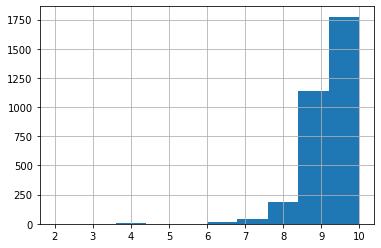

In [44]:
df_4['review_scores_value'].hist()

The review columns are filled with their median because the data is right skewed.

In [45]:
df_4['review_scores_rating'].fillna(value = df_4['review_scores_rating'].mean())

0        95.000000
1        96.000000
2        97.000000
3        94.539262
4        92.000000
           ...    
3813     80.000000
3814    100.000000
3815     94.539262
3816     94.539262
3817     94.539262
Name: review_scores_rating, Length: 3818, dtype: float64

In [46]:
df_4['review_scores_accuracy'].fillna(value = df_4['review_scores_accuracy'].median(), inplace = True)
df_4['review_scores_cleanliness'].fillna(value = df_4['review_scores_cleanliness'].median(),inplace = True)
df_4['review_scores_checkin'].fillna(value = df_4['review_scores_checkin'].median(),inplace = True)
df_4['review_scores_communication'].fillna(value = df_4['review_scores_communication'].median(),inplace = True)
df_4['review_scores_location'].fillna(value = df_4['review_scores_location'].median(),inplace = True)
df_4['review_scores_value'].fillna(value = df_4['review_scores_value'].median(),inplace = True)
df_4['review_scores_rating'].fillna(value = df_4['review_scores_rating'].median(),inplace = True)


The first analysis I performed is to find the most popular Property and Room Types listed. From the The most listed property types are Houses and Apartments. From the analysis, it can be seen that most Airbnb hosts prefer to list their entire property rather than listing a single room.

In [47]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=90)
    plt.ylabel('No of Listings')
    plt.show()

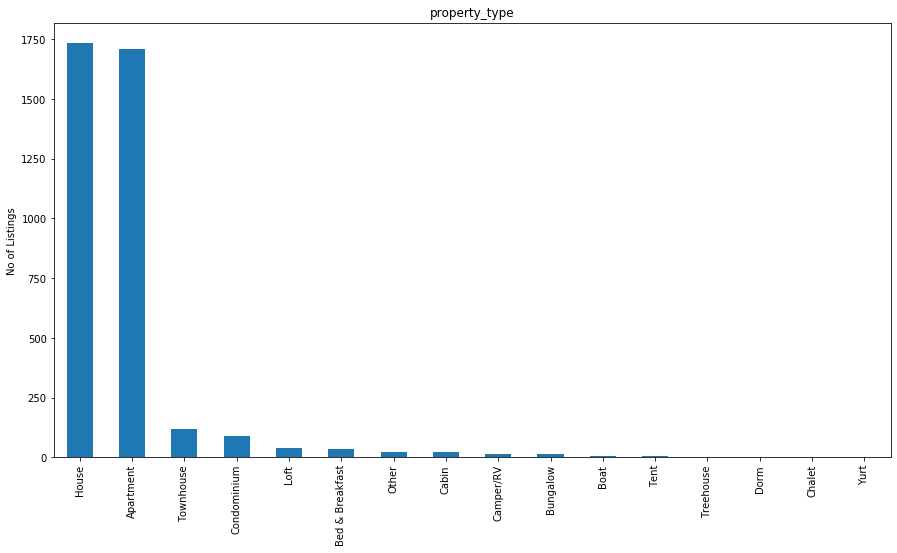

House              0.454021
Apartment          0.447472
Townhouse          0.030914
Condominium        0.023841
Loft               0.010479
Bed & Breakfast    0.009693
Other              0.005764
Cabin              0.005502
Camper/RV          0.003406
Bungalow           0.003406
Boat               0.002096
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64


In [48]:
for col in ['property_type']:
    category_count_plot(col, figsize=(15,8))
    print(df[col].value_counts(normalize=True))

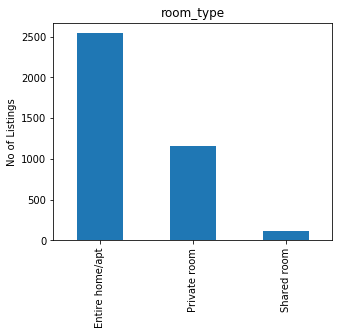

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64


In [49]:
for col in ['room_type']:
    category_count_plot(col, figsize=(5,4))
    print(df[col].value_counts(normalize=True))

Here I am to to find the average price for a Listing based on Property Type, Room Type, Number of Guests, and Number of Bedrooms.

In [50]:
def category_plot(col2, figsize=(8,4)):
    """
    Plots a simple bar chart of the average price for each category in the column specified.
    """
    df_col2 = df_4.groupby(col2).price.mean()
    

    plt.figure(figsize=figsize)
    df_col2.plot(kind='bar',legend = False )
    plt.title('Mean Prices for the Different {}'.format(col2))
    plt.xlabel(col2)
    plt.ylabel('Price')
    plt.show()

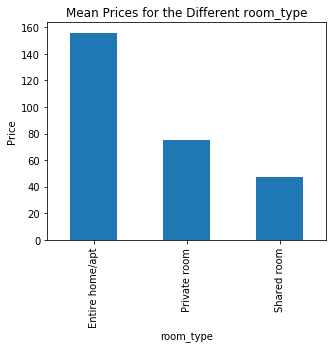

In [51]:
for col in ['room_type']:
    category_plot(col, figsize=(5,4))


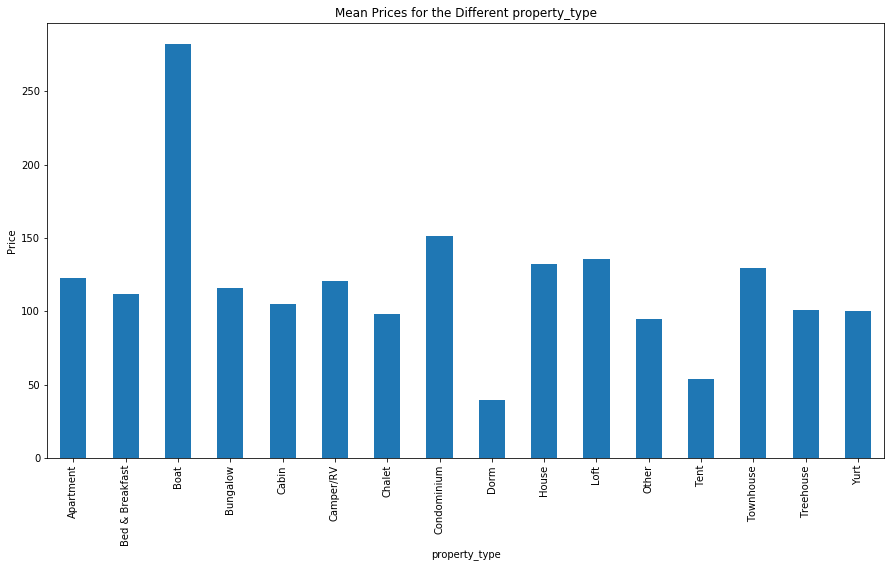

In [52]:
for col in ['property_type']:
    category_plot(col, figsize=(15,8))


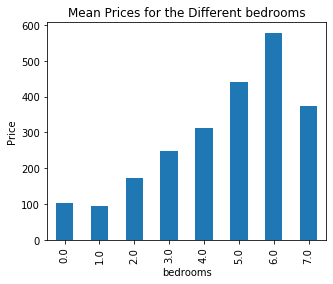

In [53]:
for col in ['bedrooms']:
    category_plot(col, figsize=(5,4))

The more the number of rooms the higher the price of the roo. This isnt really surprising.

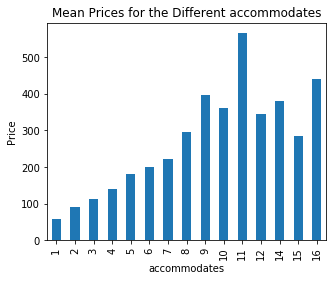

In [54]:
for col in ['accommodates']:
    category_plot(col, figsize=(5,4))

Convert categorical variable into dummy variables.

In [55]:
df_5 = pd.get_dummies(df_4,drop_first = True)

In [56]:
df_5

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,...,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,2.0,3.0,3.0,450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Section 4: Data Modeling

In [57]:
#importing the libary to split dataset into training and test data.
from sklearn.model_selection import train_test_split


In [58]:
#split the data 
x = df_5.drop(['price'],axis = 1)
y = df_5['price']

In [59]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor


In [61]:
gbrt = GradientBoostingRegressor(random_state = 3)

In [62]:
gbrt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
gbrt.score(x_train,y_train)

0.7372015662243575

In [64]:
gbrt.score(x_test,y_test)

0.6416809165493378

The model was able to predict about 63% of the test data correctly.

In [65]:
#predicting the test price to see how well the model worked.
y_predict = gbrt.predict(x_test)

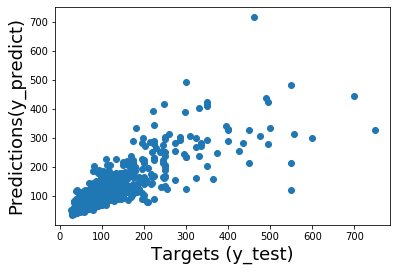

In [66]:
#comparing predicted price to actual price
plt.scatter(y_test, y_predict)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel("Predictions(y_predict)",size = 18)

plt.show()

From the diagram we can say that our model is good at predicting listings with low prices.

In [67]:
#checking for the most important features
gbrt.feature_importances_

array([1.30556975e-01, 9.01659106e-02, 4.32670413e-01, 1.94071138e-03,
       2.35820210e-02, 9.43634792e-02, 5.37637098e-03, 1.77824503e-02,
       5.60538161e-03, 5.29340660e-03, 5.74791509e-03, 5.46448154e-03,
       6.24550538e-03, 1.06873660e-02, 5.24148364e-03, 5.05682488e-03,
       2.75341874e-04, 5.76445692e-04, 9.76562757e-04, 0.00000000e+00,
       3.72182262e-03, 1.20443039e-04, 4.12575209e-03, 8.89336277e-04,
       0.00000000e+00, 1.18272257e-04, 1.28913680e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11808108e-03,
       0.00000000e+00, 0.00000000e+00, 3.45697156e-03, 4.73254810e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58389005e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.08701814e-04, 0.00000000e+00, 2.23682236e-04, 0.00000000e+00,
       0.00000000e+00, 1.04302809e-03, 1.73481618e-03, 0.00000000e+00,
      

In [68]:
#creating a table o show the features and their corresponding weights. 
summary = pd.DataFrame(x.columns.values, columns = ['Features'])
summary['Weights'] = gbrt.feature_importances_
summary.sort_values('Weights', inplace=True, ascending = False)
summary

,Features,Weights
2,bedrooms,0.432670
0,accommodates,0.130557
5,cleaning_fee,0.094363
1,bathrooms,0.090166
124,room_type_Private room,0.029569
...,...,...
74,neighbourhood_cleansed_North Beacon Hill,0.000000
72,neighbourhood_cleansed_North Admiral,0.000000
71,neighbourhood_cleansed_Mount Baker,0.000000
38,neighbourhood_cleansed_East Queen Anne,0.000000


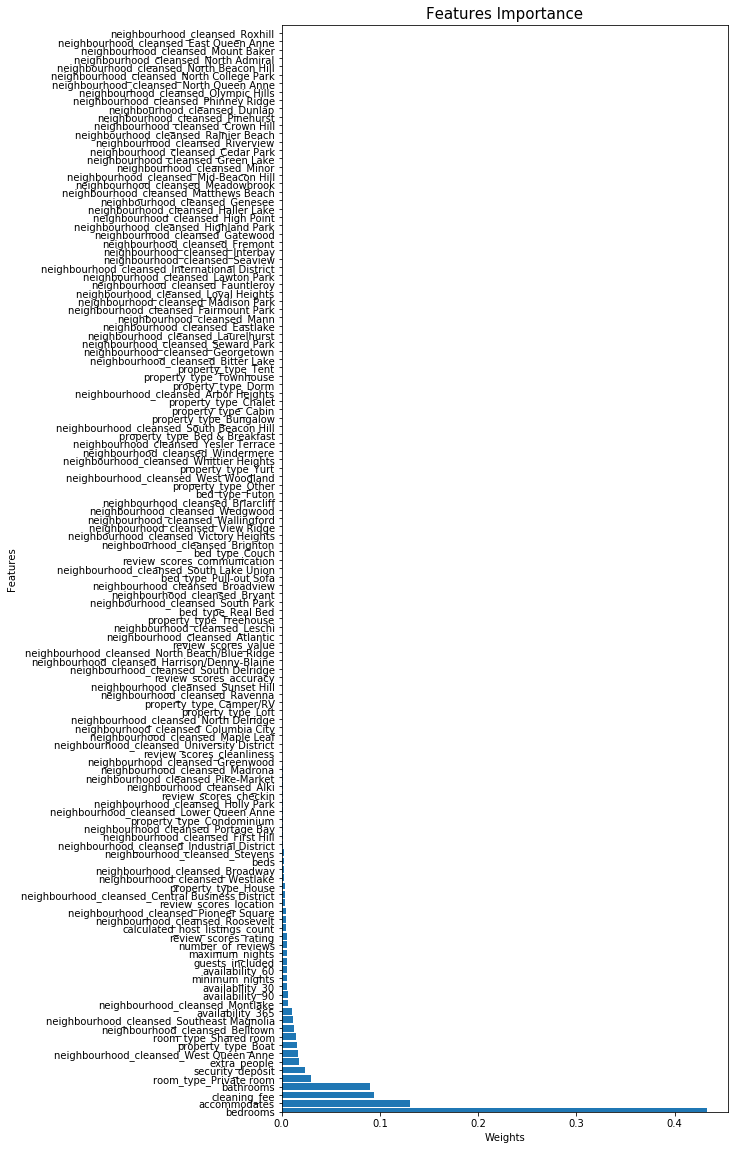

In [69]:
#plotting a chart to show the most important features used in setting the price of listings.
plt.figure(figsize=(8,20))

plt.barh(summary['Features'],summary['Weights']) 
plt.title('Features Importance', fontsize=15)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.margins(y=0.01)

plt.ylim(0,summary['Features'].size)
plt.show()

We can see that the most important features in setting the price of a listing the number of bedrooms a listing has, the number of people it can accomodate.
 

# Section 6: Evaluation and Conclusion

Question 1 - What are the most popular Property and Room Types listed?


From the analysis, it can be seen that most Airbnb hosts prefer to list their entire property rather than listing a single room.


Question 2 - What is the average price for a Listing based on Property Type, Room Type, Number of Guests, and Number of Bedrooms?

The results of the bar chart don't really give us any information we couldn't have deciphered ourselves. Boats are the most expensive property types which isn't much of a surprise. The more room and number of people a listing can accommodate the higher the price.


Question 3 - Is it possible to predict the price of listings and what are the most important features in determining the price?

The model built is good at predicting listings with low prices. The model’s score is 0.639 of the test data which means about 63% of our predictions are correct.
About half of the features have zero weight which means they can be dropped if try to improve the model. Performing NLP on the text data removed earlier could give us more insight and might help in building a better model.

Full analysis and graphs can be seen https://adewoletomiwa.medium.com/data-analysis-of-seattle-airbnb-c8715dcbb07e